<div style="text-align: center;">
     <h1>OASIS INFOBYTE </h1>
    <h3>Author:-Srimanta Ghosh </h3>
    <h4>Task-4 </h4>
     <h2>Email Spam Detection With ML</h2>
</div>

## Introduction

The following documentation outlines the steps involved in building a machine learning model for Email spam detection using Python and various libraries such as Pandas, Matplotlib, Seaborn, and Scikit-learn. Each section describes a specific part of the code, providing clarity and understanding of the process.

1. **Importing Libraries:** Imports necessary libraries for data manipulation, visualization, machine learning, and evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

2. **Load the Dataset:** Loads the dataset containing Email messages, assumed to be stored in a CSV file format.

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\gh22s\Downloads\spam.csv", encoding='latin1')

3. **Encoding Labels:** Encodes the categorical labels ('spam' and 'ham') into numerical format (0 and 1).

In [3]:
# Encode labels to binary format
label_encoder = LabelEncoder()
data['v1'] = label_encoder.fit_transform(data['v1'])

4. **Preparing Data:** Creates a new DataFrame containing only the encoded labels and the Email text.

In [4]:
df = data[['v1', 'v2']].copy()

# Display the new DataFrame
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


5. **Feature Engineering:** Converts the text data into numerical features using CountVectorizer, which converts text into a matrix of token counts.

In [5]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'v2' column
X = vectorizer.fit_transform(df['v2'])

6. **Concatenating DataFrames:** Concatenates the original DataFrame with the new DataFrame containing the transformed text features.

In [6]:
# Convert the sparse matrix to a DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Drop the original 'email_contents' column from the original DataFrame
df_without_original_column = df.drop(columns=['v2'])

# Concatenate the new DataFrame with the original DataFrame without the original column
new_df = pd.concat([df_without_original_column, X_df], axis=1)

# Display the new DataFrame with the transformed columns
new_df.head()

,v1,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7. **Data Splitting:** Splits the data into training and testing sets for model evaluation.

In [7]:
# Assuming 'v1' is the target column
X = new_df.drop(columns=['v1'])  # Features
y = new_df['v1']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

8. **Model Training:** Initializes and trains a K-Nearest Neighbors classifier.

In [8]:
# Initialize K-Nearest Neighbors classifier
k = 10  # Choose the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the model
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

9. **Model Evaluation:** Evaluates the model's accuracy on the test set.

In [9]:
# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8941704035874439


10. **Classification Report:** Prints a detailed classification report including precision, recall, and F1-score.

In [10]:
# Print classification report with better formatting
print("Classification Report:\n")
print(f"{classification_report(y_test, y_pred)}")

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       965
           1       1.00      0.21      0.35       150

    accuracy                           0.89      1115
   macro avg       0.95      0.61      0.65      1115
weighted avg       0.91      0.89      0.86      1115



11. **Confusion Matrix Visualization:** Visualizes the confusion matrix to evaluate the model's performance.

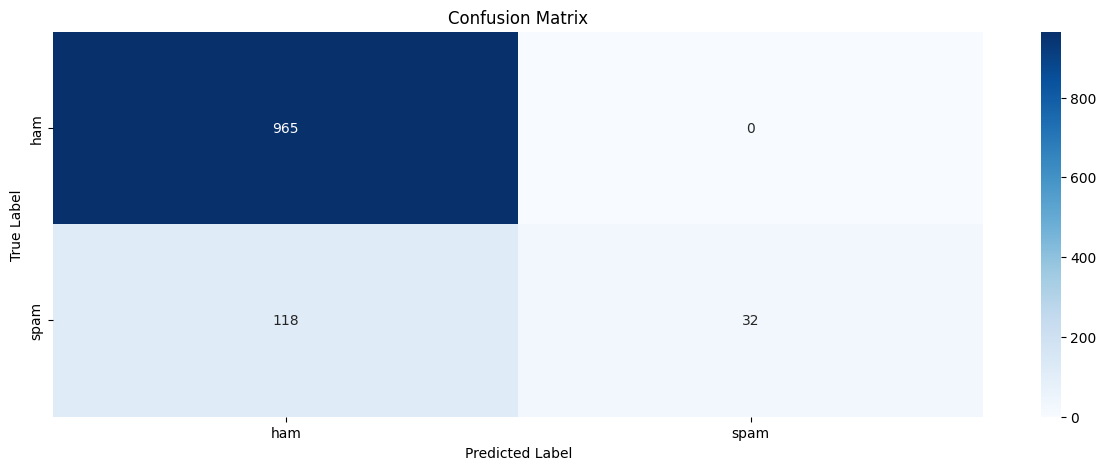

In [11]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(15, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

13. **ROC Curve Visualization:** Visualizes the ROC curve to evaluate the model's performance in binary classification tasks.

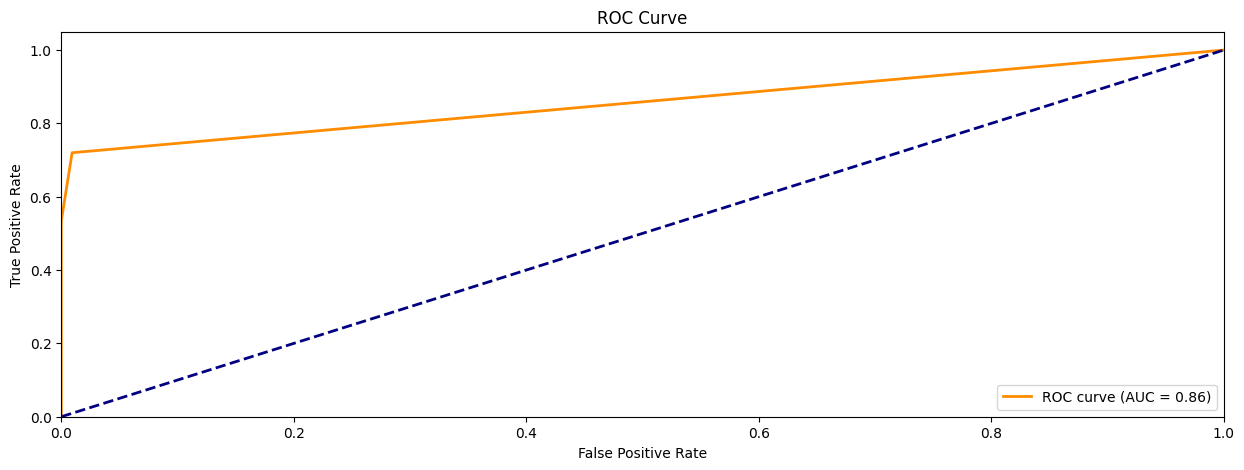

In [12]:
# Predict probabilities
y_probs = classifier.predict_proba(X_test)
y_probs_spam = y_probs[:, 1]  # Probability of being spam

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_spam)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(15, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Conclusion:

In conclusion, the implemented Email spam detection model demonstrates the application of machine learning techniques to solve a real-world problem of identifying spam messages. By following a systematic approach, the model achieves a certain level of accuracy in distinguishing between spam and ham messages. The evaluation metrics and visualizations provide insights into the model's performance and help in understanding its strengths and weaknesses. Overall, this code serves as a foundation for building more sophisticated spam detection systems and showcases the capabilities of Python and machine learning in addressing text classification tasks.